#  Multi - class Logistic Regression

**Multi - class Logistic Regression:** Here the target variable has more than two possible classes/categories. For example, salary of an employee can be categorized as **'low', 'medium' and 'high'**. There are two types of multi - class logistic regression:

1. **Multinomial Logistic Regression:**
The target variable has three or more classes/categories which are not in any particular order. So, there are three or more nominal categories.
Examples: Fruits (apple, mango, orange and banana), profession (e.g., with five groups: surgeon, doctor, nurse, dentist, therapist)

2. **Ordinal Logistic Regression:**
The target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories.
For example, the student performance can be categorized as poor, average, good and excellent, the salary of an employee can be categorized as **'low', 'medium' and 'high'**

## Agenda
*  About Dataset
*  Loading Libraries and Data
*  Understanding the Data
*  Separating Input and Output Variables
*  Splitting Data into Train and Test Sets
*  Build Model
*  Prediction
*  Check Model Performace


### About Dataset
Given different physiochemical tests, we want to predict the quality of wine in range 1 to 10.

### Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

In data science, numpy and pandas are most commonly used libraries. Numpy is required for calculations like means, medians, square roots, etc. Pandas is used for data processin and data frames. We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd).

In [1]:
import pandas as pd       # Data analysis and manipultion tool

# loading data
red_wine_data = pd.read_csv("winequality-red.csv")

In [2]:
# Understanding Data

red_wine_data.head() # 1st 5 rows default

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# checking coloumns

red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Different attributes
**Input variables (based on physicochemical tests):**
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9.  pH
10.  sulphates
11.  alcohol <br>
**Output variable (based on sensory data):**
12. quality (score between 0 and 10)

In [4]:
# target variable 'quality'.
red_wine_data.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [5]:
red_wine_data.value_counts()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
                     

<Axes: xlabel='quality'>

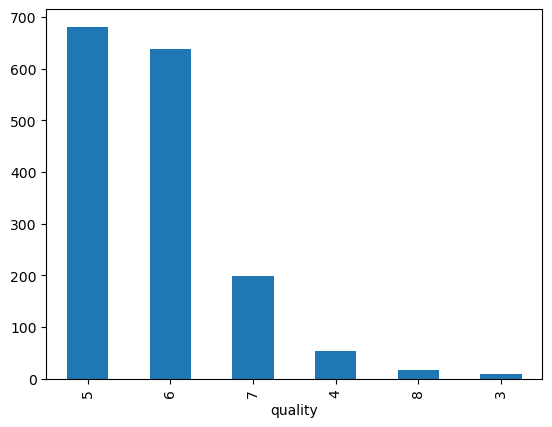

In [6]:
#graph
red_wine_data.quality.value_counts().plot(kind='bar')

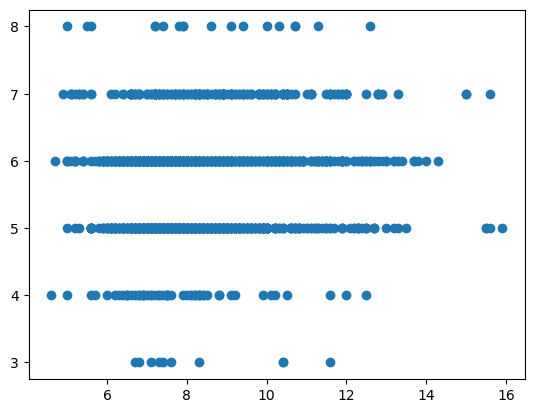

In [7]:
%matplotlib inline
y=red_wine_data.quality
import matplotlib.pyplot as plt

plt.scatter(red_wine_data['fixed acidity'],y)

##### crosstab

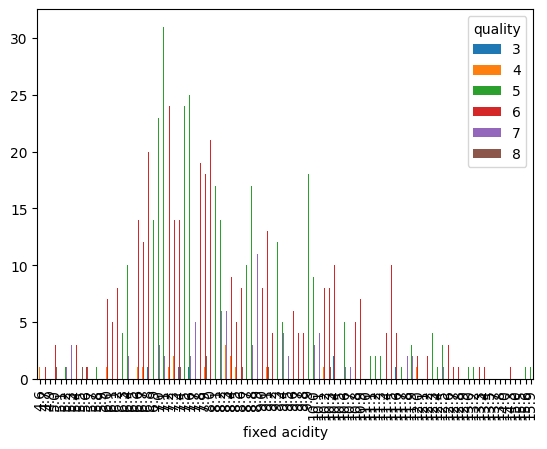

In [8]:
# group mean

red_wine_data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


We can observe here more wines are of average quality than poor quality and good quality. This is what we had observed in our EDA notebook of wine data.

<br>

We have already done the EDA part of this dataset in our earlier notebook. So we will not dive into EDA more here. Let's separate the independent and dependent variables.

### Separating Input Features and Output Features
Before building any machine learning model, we always separate the input variables and output variables. Input variables are those quantities whose values are changed naturally in an experiment, whereas output variable is the one whose values are dependent on the input variables. So, input variables are also known as independent variables as its values are not dependent on any other quantity, and output variable/s are also known as dependent variables as its values are dependent on other variable i.e. input variables. Like here in this data, we can see that whether a person will buy insurance or not is dependent on the age of that person

By convention input variables are represented with 'X' and output variables are represented with 'y'.

In [9]:
# Input/independent variables
# Output/Dependent variable

x = red_wine_data.iloc[:,:-1]
y =  red_wine_data['quality']

### Splitting the data into Train and Test Set
We want to check the performance of the model that we built. For this purpose, we always split (both input and output data) the given data into training set which will be used to train the model, and test set which will be used to check how accurately the model is predicting outcomes.


For this purpose we have a class called 'train_test_split' in the 'sklearn.model_selection' module.

- split the data
-  X_train: independent/input feature data for training the model
- y_train: dependent/output feature data for training the model
- X_test: independent/input feature data for testing the model; will be used to predict the output values
- y_test: original dependent/output values of X_test; We will compare this values with our predicted values to check the performance of our built model.

- test_size = 0.30: 30% of the data will go for test set and 70% of the data will go for train set
- random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

In [10]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [11]:
## Building Model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Fit the model
model.fit(x_train,y_train)

# warning is because:  Different columns in this dataset are in different scales. One may get 'ConvergenceWarning' here while fitting the model.

D:\softwares\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Point to be noted:**
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
          
                 random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Prediction
Now logistic regression model (i.e. log_model) is trained using X_train and y_trian data. Let's predict the target value (i.e. the quality of wine) for the X_test data. We use "predict()" method for prediction.

In [12]:
# predictions

y_pred = model.predict(x_test)

In [13]:
import numpy as np
np.array(y_test)

array([6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 3, 5, 5, 6, 7, 5, 7, 8, 5, 5, 6,
       5, 6, 6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 6, 5, 7, 5, 4, 6, 5, 5, 7, 5,
       5, 6, 7, 6, 5, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 7, 5, 6, 6, 5,
       6, 5, 6, 5, 6, 4, 6, 6, 6, 5, 8, 5, 6, 6, 5, 6, 5, 6, 6, 7, 5, 6,
       7, 4, 7, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 6, 7, 6, 5, 6, 5,
       8, 5, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 8, 5, 5, 5, 6, 6, 6, 5, 6, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 7, 5, 7, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6,
       6, 5, 5, 6, 4, 6, 5, 7, 5, 5, 4, 5, 7, 6, 5, 6, 6, 7, 6, 5, 5, 6,
       5, 7, 5, 6, 6, 5, 7, 5, 5, 5, 6, 7, 7, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 6, 6, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 4,
       6, 7, 6, 7, 5, 6, 6, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       7, 7, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5, 5, 6, 5, 7,
       5, 6, 4, 6, 6, 8, 6, 5, 5, 6, 5, 7, 6, 6, 5,

In [14]:
y_pred

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6,

### Model Performance
We can also check how accurate our model is performing using the 'accuracy_score' class from 'sklearn.metrics'.

In [15]:
model.score(x_test,y_test)

0.5458333333333333

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test, y_pred)

0.5458333333333333

Our model is predicting 54.58% correct results.

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  12,   5,   0,   0],
       [  0,   0, 140,  55,   0,   0],
       [  0,   0,  77, 121,   2,   0],
       [  0,   0,   4,  56,   1,   0],
       [  0,   0,   0,   5,   1,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

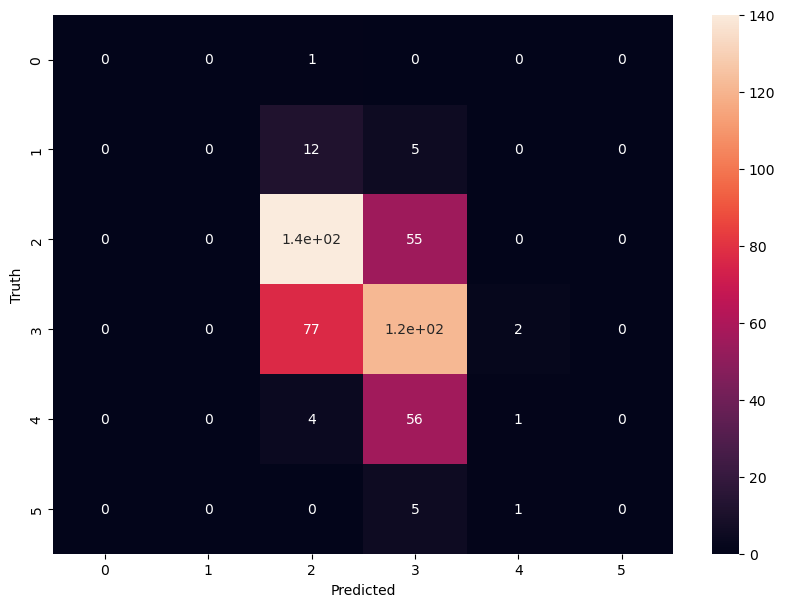

In [18]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))

sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
# improve accuracy by test size varing
# check other values affecting the target values 
# check with each factors with it 
# remove the factors or attributes that is not effiting and increase the accuracy 

# Can be analyses by using scatter graph or  crosstab or  group mean

In [20]:
###### analyse the importance

# Get feature importance
feature_importance = model.coef_[0]

# Display feature importance
for i, imp in enumerate(feature_importance):
    print(f"Feature {x.columns[i]} importance: {imp}")

Feature fixed acidity importance: 0.12369747886663462
Feature volatile acidity importance: 0.1491572032667956
Feature citric acid importance: -0.02475820504335547
Feature residual sugar importance: 0.1063499105719904
Feature chlorides importance: 0.01691607160360506
Feature free sulfur dioxide importance: 0.06922440813453694
Feature total sulfur dioxide importance: -0.05484777677828968
Feature density importance: -0.0007498010036725678
Feature pH importance: 0.019188329644892945
Feature sulphates importance: -0.03419545515733608
Feature alcohol importance: -0.23641502430868241


In [21]:
#######################    Featue improvement #########################################

In [22]:
# Get feature importance sorted 
feature_importance = model.coef_[0]

# Create a list of tuples containing feature names and their importance
features_importance_list = list(zip(x.columns, feature_importance))

# Sort the list based on the absolute value of importance in descending order
sorted_features_importance = sorted(features_importance_list, key=lambda x: abs(x[1]), reverse=True)

# Display feature importance
for feature, importance in sorted_features_importance:
    print(f"Feature {feature} importance: {importance}")

Feature alcohol importance: -0.23641502430868241
Feature volatile acidity importance: 0.1491572032667956
Feature fixed acidity importance: 0.12369747886663462
Feature residual sugar importance: 0.1063499105719904
Feature free sulfur dioxide importance: 0.06922440813453694
Feature total sulfur dioxide importance: -0.05484777677828968
Feature sulphates importance: -0.03419545515733608
Feature citric acid importance: -0.02475820504335547
Feature pH importance: 0.019188329644892945
Feature chlorides importance: 0.01691607160360506
Feature density importance: -0.0007498010036725678


In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [24]:
data = pd.read_csv("winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
# x = np.array(data['alcohol']).reshape(-1, 1)

x = data[["volatile acidity", "fixed acidity", "alcohol"]]
y = data['quality']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.21, random_state=42)

In [27]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

log_model.score(x_test,y_test)

D:\softwares\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5595238095238095